In [1]:
from IPython.display import HTML

HTML('''<script>
  code_show=true;
  function code_toggle() {
    if (code_show){
      $('div.input').hide();
    } else {
      $('div.input').show();
    }
    code_show = !code_show
  }
  $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code on/off"></form>''')

<h1 style="font size: 30px; color:#7bb661; align: center; text-shadow: 2px 2px #3B3B38;">DATA PROCESSING </h1>

### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fish.csv')

data.style.background_gradient(cmap='Pastel2')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000
5,Bream,450.000000,26.800000,29.700000,34.700000,13.602400,4.927400
6,Bream,500.000000,26.800000,29.700000,34.500000,14.179500,5.278500
7,Bream,390.000000,27.600000,30.000000,35.000000,12.670000,4.690000
8,Bream,450.000000,27.600000,30.000000,35.100000,14.004900,4.843800
9,Bream,500.000000,28.500000,30.700000,36.200000,14.226600,4.959400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Rename some column names

In [5]:
a=data
a.rename(columns={'Length1': 'Vertical_Length'}, inplace=True)
a.rename(columns={'Length2': 'Diagonal_Length'}, inplace=True)
a.rename(columns={'Length3': 'Cross_Length'}, inplace=True)
a.style.background_gradient(cmap='Pastel2')

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000
5,Bream,450.000000,26.800000,29.700000,34.700000,13.602400,4.927400
6,Bream,500.000000,26.800000,29.700000,34.500000,14.179500,5.278500
7,Bream,390.000000,27.600000,30.000000,35.000000,12.670000,4.690000
8,Bream,450.000000,27.600000,30.000000,35.100000,14.004900,4.843800
9,Bream,500.000000,28.500000,30.700000,36.200000,14.226600,4.959400


In [6]:
data["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Looking for 0 Values

In [7]:
data.isnull().sum()

Species            0
Weight             0
Vertical_Length    0
Diagonal_Length    0
Cross_Length       0
Height             0
Width              0
dtype: int64

In [8]:
for col in data.columns:
    print("The minimum value for the columns {} is {}".format(col, data[col].min()))

The minimum value for the columns Species is Bream
The minimum value for the columns Weight is 0.0
The minimum value for the columns Vertical_Length is 7.5
The minimum value for the columns Diagonal_Length is 8.4
The minimum value for the columns Cross_Length is 8.8
The minimum value for the columns Height is 1.7284
The minimum value for the columns Width is 1.0476


### Data Imputation

In [9]:
#Filtering Data
b=data[(data['Species'] == 'Roach') & (data['Vertical_Length'] <= 20)]

b.style.background_gradient(cmap='Pastel2')

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
35,Roach,40.000000,12.900000,14.100000,16.200000,4.147200,2.268000
36,Roach,69.000000,16.500000,18.200000,20.300000,5.298300,2.821700
37,Roach,78.000000,17.500000,18.800000,21.200000,5.575600,2.904400
38,Roach,87.000000,18.200000,19.800000,22.200000,5.616600,3.174600
39,Roach,120.000000,18.600000,20.000000,22.200000,6.216000,3.574200
40,Roach,0.000000,19.000000,20.500000,22.800000,6.475200,3.351600
41,Roach,110.000000,19.100000,20.800000,23.100000,6.167700,3.395700
42,Roach,120.000000,19.400000,21.000000,23.700000,6.114600,3.294300


Since weight is usually affected by length, we'll replace the zero value with the closest Roach's length

In [10]:
data.iloc[[40]] = data.iloc[[40]].replace({0.0 : 120})
b=data.iloc[[40]]
b.style.background_gradient(cmap='Pastel2')

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
40,Roach,120.000000,19.000000,20.500000,22.800000,6.475200,3.351600


In [11]:
c=data[(data['Species'] == 'Roach') & (data['Vertical_Length'] <= 20)]
c.style.background_gradient(cmap='Pastel2')

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
35,Roach,40.000000,12.900000,14.100000,16.200000,4.147200,2.268000
36,Roach,69.000000,16.500000,18.200000,20.300000,5.298300,2.821700
37,Roach,78.000000,17.500000,18.800000,21.200000,5.575600,2.904400
38,Roach,87.000000,18.200000,19.800000,22.200000,5.616600,3.174600
39,Roach,120.000000,18.600000,20.000000,22.200000,6.216000,3.574200
40,Roach,120.000000,19.000000,20.500000,22.800000,6.475200,3.351600
41,Roach,110.000000,19.100000,20.800000,23.100000,6.167700,3.395700
42,Roach,120.000000,19.400000,21.000000,23.700000,6.114600,3.294300


<h1 style="font-size: 30px; color:#7bb661; align: center; text-shadow: 2px 2px #3B3B38;">DATA EXPLORATION </h1>

In [12]:
d=data.groupby('Species').mean().round(2)

d.style.background_gradient(cmap='Pastel2')

,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
Species,,,,,,
Bream,617.830000,30.310000,33.110000,38.350000,15.180000,5.430000
Parkki,154.820000,18.730000,20.350000,22.790000,8.960000,3.220000
Perch,382.240000,25.740000,27.890000,29.570000,7.860000,4.750000
Pike,718.710000,42.480000,45.480000,48.720000,7.710000,5.090000
Roach,158.050000,20.640000,22.280000,24.970000,6.690000,3.660000
Smelt,11.180000,11.260000,11.920000,13.040000,2.210000,1.340000
Whitefish,531.000000,28.800000,31.320000,34.320000,10.030000,5.470000


In [13]:
e=data[(data['Weight'] == data['Weight'].max()) | (data['Weight'] == data['Weight'].min())]

e.style.background_gradient(cmap='Pastel2')

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
72,Perch,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000
144,Pike,1650.000000,59.000000,63.400000,68.000000,10.812000,7.480000


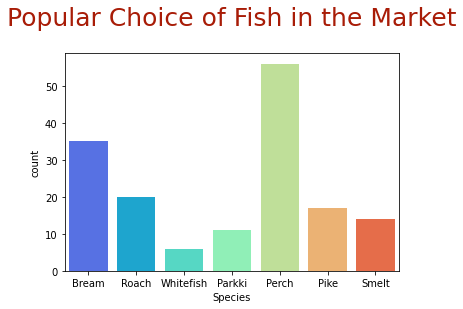

In [14]:
sns.countplot(data['Species'], palette='rainbow')
plt.text(s="Popular Choice of Fish in the Market",x=3,y=65, fontsize=25,va='bottom',ha='center', color = '#a81c07')
plt.show()

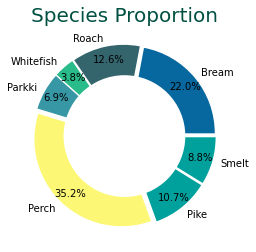

In [15]:
features = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
sizes = [data.Species[data['Species'] == 'Bream'].count(), data.Species[data['Species'] == 'Roach'].count(),
         data.Species[data['Species'] == 'Whitefish'].count(), data.Species[data['Species'] == 'Parkki'].count(),
         data.Species[data['Species'] == 'Perch'].count(), data.Species[data['Species'] == 'Pike'].count(),
         data.Species[data['Species'] == 'Smelt'].count()]
hue = ['#07689F', '#34656D','#29BB89','#3797A4','#FCF876','#00A19D','#00A19D']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, labels = features, colors = hue,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Species Proportion', size = 20, color = '#005142')
plt.show()

### Observations:

The first table shows the mean value of `Wegiht`, `Height`, `Width`, and different `Length` in every `Species` available in the market. We can observe that the average weight of all species Pike is the heaviest for at least 718.71g the lighest is Smelt around 11 g. On the other hand, Pike species has the longest average length particularly in its vertical length while Smelt sprecies is the shortest. This goes to their diagonal lenght and cross lenght  with a slight difference of mean value to the vertical length. 

It can be observed that `Perch` is the most popular choice in the Market since it is the highest count among the rest for around 35% of the dataset while `Whitefish` is the least around 3% of the dataset. 

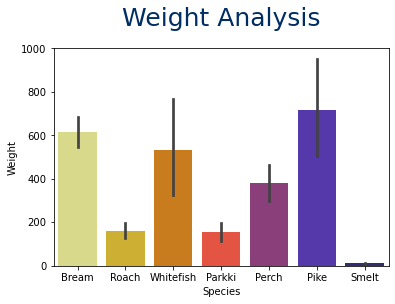

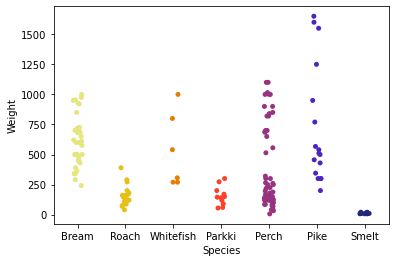

In [16]:
sns.barplot(x = data['Species'], y = data['Weight'], palette='CMRmap_r')
plt.text(s="Weight Analysis",x=3,y=1080, fontsize=25,va='bottom',ha='center', color = '#002e63')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Weight'],palette='CMRmap_r')
plt.show()
plt.close()

### Weight Analysis

Barplot shows the result of the heaviest weight among different species. `Bream`, `Whitefish` and `Pike` is the top 3 heaviest species. We can observe that in `Perch` species there are plenty of it weighed around 250g compared to heavier mass as well as the `Roach` species. 

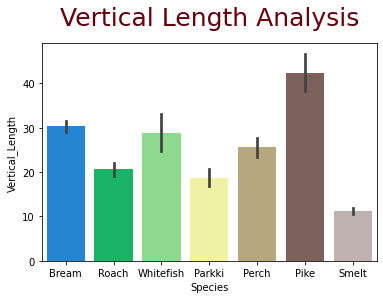

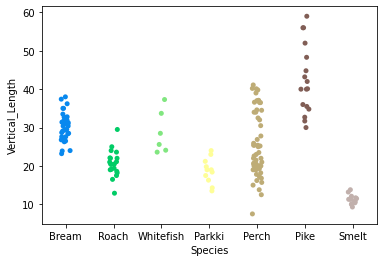

In [17]:
sns.barplot(x = data['Species'], y = data['Vertical_Length'], palette='terrain')
plt.text(s="Vertical Length Analysis",x=3,y=52, fontsize=25,va='bottom',ha='center', color = '#65000b')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Vertical_Length'],palette='terrain')
plt.show()
plt.close()

### Vertical Length Analysis
The first graph shows the result of the longest vertical length species. Among the others `Pike` is the longest while `Smelt` is the shortest. `Parki` and `Roach` are almost identical as well as `beam` and `whitefish`. We can observe that most of `Bream` species' height are around 27cm to 39 cm. 

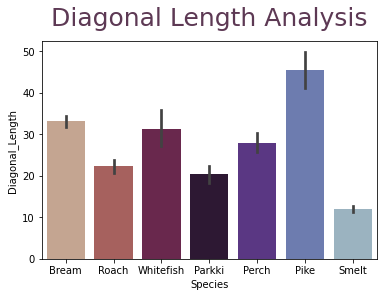

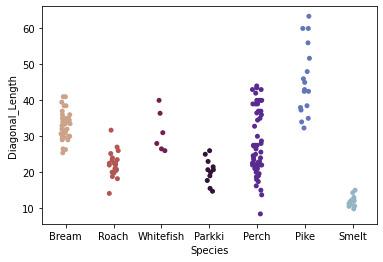

In [18]:
sns.barplot(x = data['Species'], y = data['Diagonal_Length'], palette='twilight_r')
plt.text(s="Diagonal Length Analysis",x=3,y=55, fontsize=25,va='bottom',ha='center', color = '#5d3954')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Diagonal_Length'],palette='twilight_r')
plt.show()
plt.close()

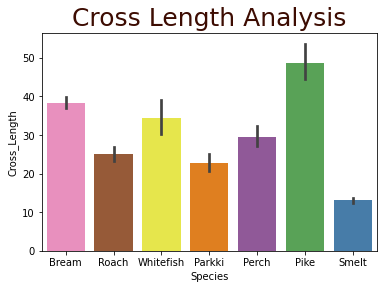

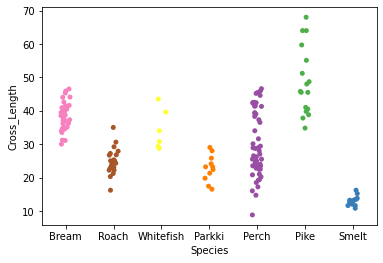

In [19]:
sns.barplot(x = data['Species'], y = data['Cross_Length'], palette='Set1_r')
plt.text(s="Cross Length Analysis",x=3,y=57, fontsize=25,va='bottom',ha='center', color = '#3d0c02')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Cross_Length'],palette='Set1_r')
plt.show()
plt.close()

### Cross and Diagonal Length Analysis

Cross and Diagonal length has the same results to Vetrical length. However, there are slight difference to their height.

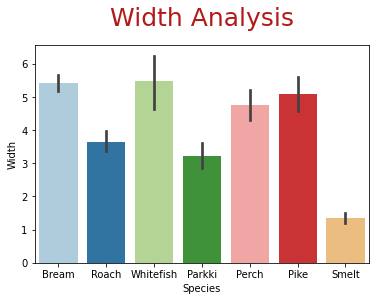

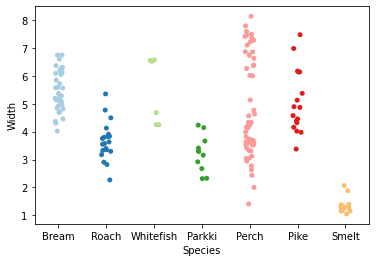

In [20]:
sns.barplot(x = data['Species'], y = data['Width'], palette='Paired')
plt.text(s="Width Analysis",x=3,y=7, fontsize=25,va='bottom',ha='center', color = '#b31b1b')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Width'],palette='Paired')
plt.show()
plt.close()

### Width Analysis 

We can observe that `Bream` and `Whitefish` are almost identical to its average width. Both of them are the highest capacity of width among the others. 

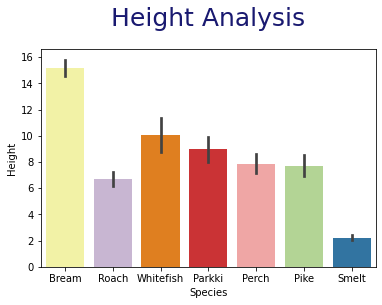

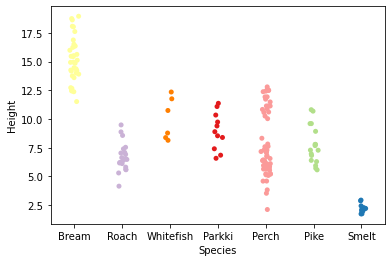

In [21]:
sns.barplot(x = data['Species'], y = data['Height'], palette='Paired_r')
plt.text(s="Height Analysis",x=3,y=18, fontsize=25,va='bottom',ha='center', color = '#191970')
plt.show()
plt.close()

sns.stripplot(x = data['Species'], y = data['Height'],palette='Paired_r')
plt.show()
plt.close()

### Height Analysis

It is visisble that `Bream` has the tallest height while `Smelt` is the shortest. 

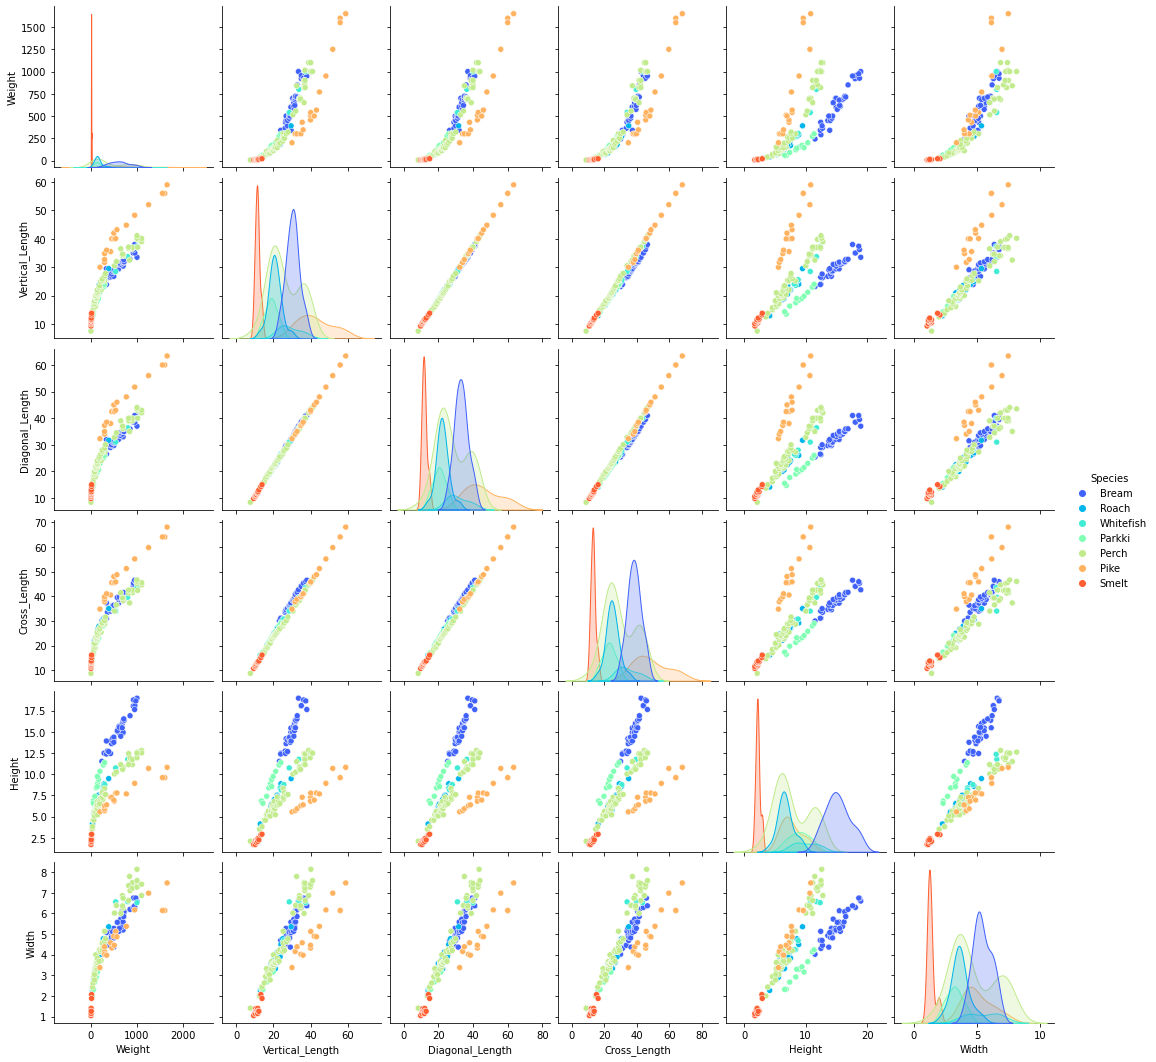

In [22]:
sns.pairplot(data, hue = 'Species', palette = 'rainbow')

The pairplot above shows a strong positive correlation. We want to estimate the `Weight` of the fish to different features so we need to identify the features that correlates to the `Weight`. Fortunately `Weight` correlates to every feature available. 

### Objective


<h1 style="font size: 30px; color:#7bb661; align: center; text-shadow: 2px 2px #3B3B38;">MACHINE LEARNING </h1>

### Linear Regression

#### Linearn Regression without L1 & L2

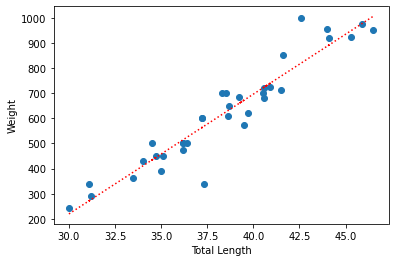

In [37]:
# we want to estimate the relationship between two
df_bream = data[data['Species'] == 'Bream']

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

X = df_bream.Cross_Length.values.reshape(-1,1)
y = df_bream.Weight.values.reshape(-1,1)

linear_reg.fit(X,y)
y_head = linear_reg.predict(X)

plt.scatter(df_bream.Cross_Length,df_bream.Weight)
plt.plot(X,y_head,color= "red", linestyle=':')
plt.xlabel("Total Length")
plt.ylabel("Weight")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [39]:
print('y = ' + str('%.2f' % LR.intercept_) + ' + ' + str
      ('%.2f' % LR.coef_[0]) + '*X1 ' + ' + ' + str('%.2f' % LR.coef_[0]) + '*X2 ')

y = -1133.63 + 45.60*X1  + 45.60*X2 


In [40]:
print("training set score: R2 = %f" % LR.score(X_train, y_train))
print("test set score: R2 = %f" % LR.score(X_test, y_test))

training set score: R2 = 0.938842
test set score: R2 = 0.826496


####  With L2-Ridge Regression

R^2 = 0.94


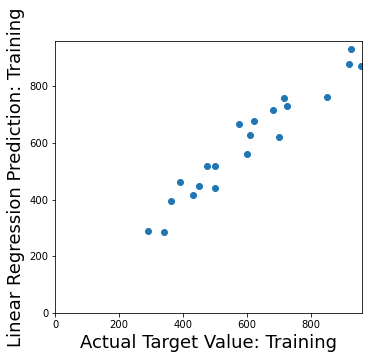

In [27]:
plt.figure(figsize=(5.5, 5))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
y_pred_train=LR.predict(X_train)
plt.plot(y_train,y_pred_train, 'o')
plt.xlim(0, max(y_train)+5 )
plt.ylim(0, max(y_train) +5)
plt.ylabel("Linear Regression Prediction: Training", fontsize=18)
plt.xlabel("Actual Target Value: Training",fontsize=18)
print("R^2 = %0.2f" % LR.score(X_train, y_train))

##### Beam and Weight

In [23]:
df_bream = data[data['Species'] == 'Bream']

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

X = df_bream.Cross_Length.values.reshape(-1,1)
y = df_bream.Weight.values.reshape(-1,1)

In [29]:
from sklearn.linear_model import Ridge
#How much importance the model places on simplicity versus training 
#set performance can be specified by the user, using the alpha parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
ridge = Ridge(alpha=0.001).fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.938842
test set score: 0.826495


In [ ]:
from sklearn.linear_model import Ridge
#How much importance the model places on simplicity versus training 
#set performance can be specified by the user, using the alpha parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
ridge = Ridge(alpha=0.001).fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

##### Using all features

In [30]:
feature_names = ['Weight','Vertical_Length','Diagonal_Length','Cross_Length','Height','Width']
x = data[feature_names]
y = data['Species']
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.35, random_state=42)

logisticregression = LogisticRegression(C=100).fit(x_train, y_train)
print("training set score: %f" % logisticregression.score(x_train, y_train))
print("test set score: %f" % logisticregression.score(x_test, y_test))
print("number of features used: %d" % np.sum(logisticregression.coef_ != 0))

training set score: 0.776699
test set score: 0.803571
number of features used: 42


#### With L1-Lasso Regression

##### Beam and Weight

In [32]:
df_bream = data[data['Species'] == 'Bream']

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

X = df_bream.Cross_Length.values.reshape(-1,1)
y = df_bream.Weight.values.reshape(-1,1)

In [33]:
#We must increase "max_iter" if not the model would warn us to increase it
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

lasso100 = Lasso(alpha=10, max_iter=100).fit(X_train, y_train)
print("training set score: %f" % lasso100.score(X_train, y_train))
print("test set score: %f" % lasso100.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso100.coef_ != 0))

training set score: 0.938713
test set score: 0.824171
number of features used: 1


##### Using all features

In [34]:
feature_names = ['Weight','Vertical_Length','Diagonal_Length','Cross_Length','Height','Width']
x = data[feature_names]
y = data['Species']

from sklearn.model_selection import train_test_split

In [35]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.25, random_state=42)
lr_l1 = LogisticRegression(C=100, penalty='l1', solver='liblinear').fit(x_train, y_train)#solver='liblinear' for small dataset
print("train accuracy of L1 logreg with 1: %f" % lr_l1.score(x_train, y_train))
print("test accuracy of L1 logreg with 1: %f"%  lr_l1.score(x_test, y_test))
print("number of features used: %d" % np.sum(lr_l1.coef_ != 0))

train accuracy of L1 logreg with 1: 0.991597
test accuracy of L1 logreg with 1: 0.950000
number of features used: 41


### Decision Tree Regressor

**Without importing parameter estimator**

In [36]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.20, random_state=42)
tree = DecisionTreeRegressor(max_depth=10, random_state=0)

tree.fit(x_train, y_train)

print("accuracy on training set: %f" % tree.score(x_train, y_train))
print("accuracy on test set: %f" % tree.score(x_test, y_test))

accuracy on training set: 0.999838
accuracy on test set: 0.944605


**Importing parameter estimator**

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
xx = data.iloc[:, 2:].values
yy = data.iloc[:, 1].values

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,
                                                        test_size=0.20, random_state=42)

param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7]}
tree1 = DecisionTreeRegressor(random_state = 1)
tree_cv = GridSearchCV(tree1, param_dist)
tree_cv.fit(x_train, y_train)

print(tree_cv.best_params_)
print(tree_cv.score(xx_test, yy_test))
print("accuracy on training set: %f" % tree_cv.score(xx_train, yy_train))
print("accuracy on test set: %f" % tree_cv.score(xx_test, yy_test))

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 1}
0.9625325399191473
accuracy on training set: 0.996894
accuracy on test set: 0.962533


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.20, random_state=42)
forest = RandomForestRegressor(n_estimators=4, random_state=42)

forest.fit(x_train, y_train)
print("accuracy on training set: %f" % forest.score(x_train, y_train))
print("accuracy on test set: %f" % forest.score(x_test, y_test))

accuracy on training set: 0.993304
accuracy on test set: 0.949271


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.20, random_state=42)
param_grid = {'bootstrap': [True], 'max_depth': [3, 5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1000]}
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid)

g_search.fit(x_train, y_train);

print(g_search.best_params_)
print(g_search.score(x_test, y_test))
print("accuracy on training set: %f" % g_search.score(x_train, y_train))
print("accuracy on test set: %f" % g_search.score(x_test, y_test))

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 1000}
0.9719448905077278
accuracy on training set: 0.996505
accuracy on test set: 0.971945


### Gradient Boosting Regressor

**Without importing parameter estimator**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.25, random_state=42)

gbrt = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 2)
gbrt.fit(x_train, y_train)

print("accuracy on training set: %f" % gbrt.score(x_train, y_train))
print("accuracy on test set: %f" % gbrt.score(x_test, y_test))

accuracy on training set: 0.814175
accuracy on test set: 0.780354


**Importing parameter estimator**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
    
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        test_size=0.20, random_state=42)
GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters)
grid_GBR.fit(x_train, y_train)
print(grid_GBR.best_params_)
print(grid_GBR.score(x_test, y_test))
print("accuracy on training set: %f" % grid_GBR.score(x_train, y_train))
print("accuracy on test set: %f" % grid_GBR.score(x_test, y_test))

{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
0.975773353863447
accuracy on training set: 0.999877
accuracy on test set: 0.975773


#### K-Nearest Neighbor Regression

In [42]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 100)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_

{'n_neighbors': 1}

In [43]:
#split for train and test data
from sklearn.neighbors import KNeighborsRegressor
#
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) #random state = reproducible and consistant
# Instantiate the model, set the number of neighbors to consider to 1:
reg = KNeighborsRegressor(n_neighbors=1)
# Fit the model using the training data and training targets:
reg.fit(x_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')
print('Regression Score', KNeighborsRegressor.score(x_test, y_test))

TypeError: score() missing 1 required positional argument: 'y'

In [ ]:
reg.score
reg.predict(x_test)
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 10) 

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(x_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(x_train, y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(x_test, y_test)) # record generalization accuracy    
fig = plt.figure(figsize=(20, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()
pass

In [ ]:
y_pred = tree.predict(xx_test)
df=pd.DataFrame({'Actual':yy_test, 'Predicted':y_pred})

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yy_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy_test, y_pred)))

# Calculate the absolute errors
errors = abs(y_pred - yy_test)
# Print out the mean absolute error (mae)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yy_test)
# Calculate and display accuracy
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)

In [ ]:
y_pred = g_search.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)

In [ ]:
y_pred = reg.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)

<table>
<thead>
<tr><th>Machine Learning Method</th><th>Test Accuracy</th><th>Feautures</th></tr>
</thead>
<tbody>
<tr><td>L2-Ridge Regression</td><td>82.64%</td><td>1 Features</td></tr>
<tr><td>L2-Ridge Regression</td><td>80.35%</td><td>42 features</td></tr>
<tr><td>L1-Lasso Regression</td><td>82.41%</td><td>1 Features</td></tr>
<tr><td>L1-Lasso Regression</td><td>97.50%</td><td>41 features</td></tr>
</tbody>
</table>

<table>
<thead>
<tr><th>Machine Learning Method</th><th>Estimator</th><th>Test Accuracy</th><th>Best Parameter</th></tr>
</thead>
<tbody>
<tr><td>Linear Regression</td><td>None</td><td>82.64%</td><td>None</td></tr>
<tr><td>Decision Tree Regressor</td><td>None</td><td>94.46%</td><td>max_depth=10, random_state=0</td></tr>
<tr><td>Decision Tree Regressor</td><td>GridSearchCV</td><td>96.25%</td><td>max_depth= 6, max_features= 5, min_samples_leaf= 1</td></tr>
<tr><td>K-Nearest Neighbor Regression</td><td>GridSearchCV</td><td>96.46%</td><td>'n_neighbors': 1</td></tr>
<tr><td>Gradient Boosting Regressor</td><td>None</td><td>78.07%</td><td>learning_rate= 0.01, max_depth= 2</td></tr>
<tr><td>Gradient Boosting Regressor</td><td>GridSearchCV</td><td>97.18%</td><td>'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5</td></tr>   
<tr><td>Random Forest Regressor</td><td>None</td><td>94.92%</td><td>n_estimators=4, random_state=42</td></tr>
<tr><td>Random Forest Regressor</td><td>GridSearchCV</td><td>97.19%</td><td>'bootstrap': True, 'max_depth': 10, 'n_estimators': 1000</td></tr>
</tbody>
</table>